In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [16]:
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [17]:
# 1. Import tips dataset
df = sns.load_dataset('tips')


In [18]:
# 2. Look at the data showing a random sample of size 5
df.sample(5)


,total_bill,tip,sex,smoker,day,time,size
135,8.51,1.25,Female,No,Thur,Lunch,2
87,18.28,4.00,Male,No,Thur,Lunch,2
27,12.69,2.00,Male,No,Sat,Dinner,2
225,16.27,2.50,Female,Yes,Fri,Lunch,2
214,28.17,6.50,Female,Yes,Sat,Dinner,3


In [19]:
# 3. Hardest day to work
day_counts = df.groupby('day', observed=False).count()
hardest_day = day_counts['total_bill'].idxmax()
print(f"Answer: {hardest_day}")


Answer: Sat


In [20]:
# 4. Best day to work
df2 = df.copy()
df2 = df2.groupby('day', observed=False)[['tip', 'total_bill']].sum()
df2['percent'] = df2['tip'] / df2['total_bill'] * 100
best_day = df2['percent'].idxmax()
print(f"Answer: {best_day}")


Answer: Fri


In [21]:
# 5. Who tipped the most
df3 = df.groupby('smoker', observed=False)[['tip', 'total_bill']].sum()
df3['percent'] = df3['tip'] / df3['total_bill'] * 100
best_tipper = df3['percent'].idxmax()
print(f"Answer: {best_tipper}")


Answer: No


In [22]:
# 6. Group by day and size
df4 = df.groupby(['day', 'size'], observed=False)[['tip', 'total_bill']].mean()
df4['percent'] = df4['tip'] / df4['total_bill'] * 100
df4 = df4.dropna()


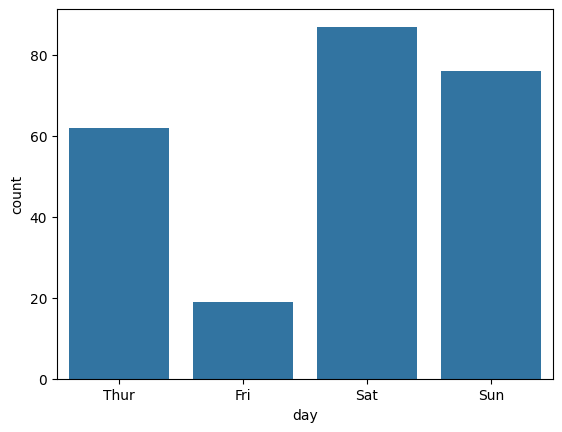

In [23]:
# 1. Per day histogram
sns.countplot(data=df, x='day', order=['Thur', 'Fri', 'Sat', 'Sun'])
plt.show()


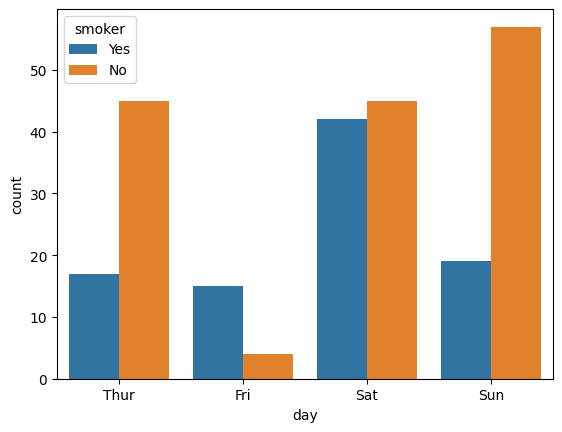

In [24]:
# 2. Per day histogram by smoker
sns.countplot(data=df, x='day', hue='smoker', order=['Thur', 'Fri', 'Sat', 'Sun'])
plt.show()


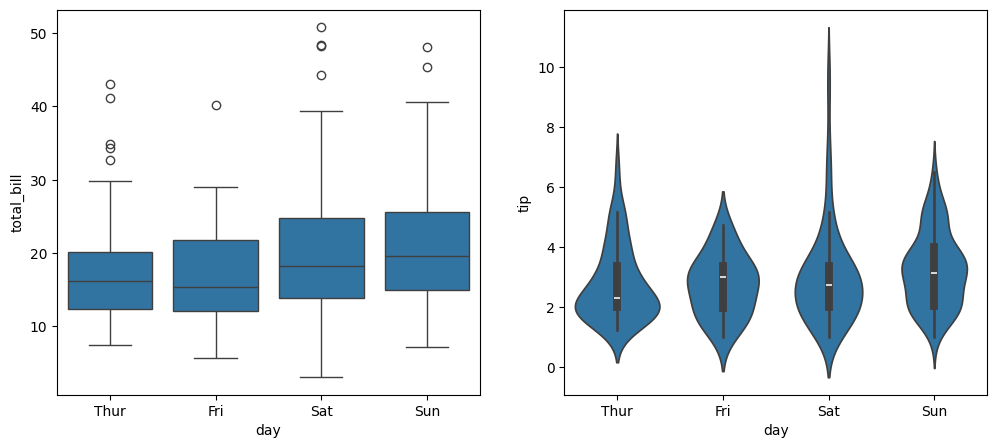

In [25]:
# 3. Two plots: box plot and violin plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='day', y='total_bill', order=['Thur', 'Fri', 'Sat', 'Sun'])
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='day', y='tip', order=['Thur', 'Fri', 'Sat', 'Sun'])
plt.show()


In [26]:
# 1. Convert sex and smoker to numerical
df['sex'] = df['sex'].replace({'Male': 0, 'Female': 1})
df['smoker'] = df['smoker'].replace({'No': 0, 'Yes': 1})
df.head()


/var/folders/t7/mqn_w9xn51d9rqq32g1vghhm0000gn/T/ipykernel_83585/2976264491.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'Male': 0, 'Female': 1})
/var/folders/t7/mqn_w9xn51d9rqq32g1vghhm0000gn/T/ipykernel_83585/2976264491.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['sex'] = df['sex'].replace({'Male': 0, 'Female': 1})
/var/folders/t7/mqn_w9xn51d9rqq32g1vghhm0000gn/T/ipykernel_83585/2976264491.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


In [27]:
# 2. Convert day using dummy variables
days = pd.get_dummies(df['day'])
days.sample(5)


,Thur,Fri,Sat,Sun
57,False,False,True,False
178,False,False,False,True
173,False,False,False,True
124,True,False,False,False
139,True,False,False,False


In [28]:
# 3. Drop column Thur
days = pd.get_dummies(df['day'], drop_first=True)
days.head()


,Fri,Sat,Sun
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True


In [29]:
# 4. Same with time
times = pd.get_dummies(df['time'], drop_first=True)
times.head()


,Dinner
0,True
1,True
2,True
3,True
4,True


In [30]:
# 5. Concat and drop columns
df = pd.concat([df, days, times], axis=1)
df = df.drop(['day', 'time'], axis=1)
df.head()


,total_bill,tip,sex,smoker,size,Fri,Sat,Sun,Dinner
0,16.99,1.01,1,0,2,False,False,True,True
1,10.34,1.66,0,0,3,False,False,True,True
2,21.01,3.50,0,0,3,False,False,True,True
3,23.68,3.31,0,0,2,False,False,True,True
4,24.59,3.61,1,0,4,False,False,True,True


In [31]:
# 1. Create X and Y
X = df[['sex', 'smoker', 'size', 'Fri', 'Sat', 'Sun', 'Dinner']]
Y = df[['tip']]


In [32]:
# 2. Split data (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [33]:
# 3. Train model and predict
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


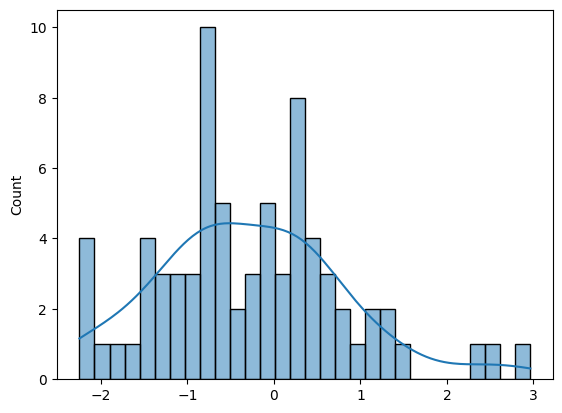

In [34]:
# 4. Histogram of differences
differences = y_test.values.flatten() - predictions.flatten()
sns.histplot(differences, bins=30, kde=True)
plt.show()


In [35]:
# 5. Predict new value
new_val = np.array([0, 0, 4, 0, 1, 0, 0]).reshape(1, -1)
tip = model.predict(new_val)
print("We expect to get %.2f$ tip." % tip[0, 0])


We expect to get 3.92$ tip.


/Users/Fedor-Ryzhenkov/Repositories/CS321 ISU/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Extra Problem: The Convex Hull

**Proof**:

If convex hulls intersect, there exists point $p$ with:
- $p = \sum_n \alpha_n x_n$ (in convex hull of X)
- $p = \sum_m \beta_m y_m$ (in convex hull of Y)

If linearly separable with $\hat{w} \cdot x_n + w_0 > 0$ and $\hat{w} \cdot y_m + w_0 < 0$:
- $\hat{w} \cdot p + w_0 = \sum_n \alpha_n (\hat{w} \cdot x_n + w_0) > 0$
- $\hat{w} \cdot p + w_0 = \sum_m \beta_m (\hat{w} \cdot y_m + w_0) < 0$

Contradiction! Therefore: convex hulls intersect ⟺ not linearly separable.
